# Umbra SAR Archive Geometry Analysis: Panama Canal
February 9, 2025

In [340]:
import geopandas as gpd
import pandas as pd
import pystac_client
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec
import numpy as np

In [341]:
os.environ['UMBRA_API_TOKEN'] = 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Im5HQmZiZkVWeFh3S0tZX0NHbWRnZiJ9.eyJodHRwczovL3VtYnJhLnNwYWNlL29yZ19uYW1lIjoibmFzYS1jc2RhIiwiaHR0cHM6Ly91bWJyYS5zcGFjZS9vcmdfZGlzcGxheV9uYW1lIjoiTkFTQSAoQ1NEQSkiLCJodHRwczovL3VtYnJhLnNwYWNlL3VzZXJfZW1haWwiOiJkc2hlYW5AdXcuZWR1IiwiY2xpZW50Ijp7ImNsaWVudF9pZCI6InJRUzVPTXJud2xmSWZ3aGlJSkZqRWxGVlhWR3FmODVrIiwiY2xpZW50X25hbWUiOiJjYW5vcHkifSwiaXNzIjoiaHR0cHM6Ly9hdXRoLmNhbm9weS51bWJyYS5zcGFjZS8iLCJzdWIiOiJhdXRoMHw2NzAwMjJiNTk0YTk0ZDBiYWNlNjFlYWIiLCJhdWQiOlsiaHR0cHM6Ly9hcGkuY2Fub3B5LnVtYnJhLnNwYWNlIiwiaHR0cHM6Ly91bWJyYS1jYW5vcHktcHJvZC51cy5hdXRoMC5jb20vdXNlcmluZm8iXSwiaWF0IjoxNzM5MTM4ODQ2LCJleHAiOjE3MzkyMjUyNDYsInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZW1haWwiLCJvcmdfaWQiOiJvcmdfRXVrZHJzcjFwZTNkWFpyUiIsImF6cCI6InJRUzVPTXJud2xmSWZ3aGlJSkZqRWxGVlhWR3FmODVrIiwicGVybWlzc2lvbnMiOltdfQ.mz0VudB7jYPDdkQCWiB6UyYapHHFEuWQwc9bNzoRIJX_8bhlrARJDOTYtoLxvF5GSjGJX5DXOOhQV5dWR14tEHuP9iUa88KxE60YyOqddAUbug7YHUr8jRxfVdMC7iSJvlJXvvRFGpSNdScSuL49t_vhnL8wZMKFNHAlR1jxYmjLgal-EMZ3kDFwqgGnmJkyGD7cZZvClqehobJ0kPYb2IOjmRMiyqq3WBXXHaMSPkKJEHreEc_HBDUhle26dvYv50g3FDFhKoR7DguMfLeaXzmfQWtbDee-BLIZBaTQ_MnF9ik5J7JM7mnnWucrfiFUgjLdWmuDAFNOxtDI8QBnwg'

In [342]:
os.environ.get('UMBRA_API_TOKEN')

'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Im5HQmZiZkVWeFh3S0tZX0NHbWRnZiJ9.eyJodHRwczovL3VtYnJhLnNwYWNlL29yZ19uYW1lIjoibmFzYS1jc2RhIiwiaHR0cHM6Ly91bWJyYS5zcGFjZS9vcmdfZGlzcGxheV9uYW1lIjoiTkFTQSAoQ1NEQSkiLCJodHRwczovL3VtYnJhLnNwYWNlL3VzZXJfZW1haWwiOiJkc2hlYW5AdXcuZWR1IiwiY2xpZW50Ijp7ImNsaWVudF9pZCI6InJRUzVPTXJud2xmSWZ3aGlJSkZqRWxGVlhWR3FmODVrIiwiY2xpZW50X25hbWUiOiJjYW5vcHkifSwiaXNzIjoiaHR0cHM6Ly9hdXRoLmNhbm9weS51bWJyYS5zcGFjZS8iLCJzdWIiOiJhdXRoMHw2NzAwMjJiNTk0YTk0ZDBiYWNlNjFlYWIiLCJhdWQiOlsiaHR0cHM6Ly9hcGkuY2Fub3B5LnVtYnJhLnNwYWNlIiwiaHR0cHM6Ly91bWJyYS1jYW5vcHktcHJvZC51cy5hdXRoMC5jb20vdXNlcmluZm8iXSwiaWF0IjoxNzM5MTM4ODQ2LCJleHAiOjE3MzkyMjUyNDYsInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZW1haWwiLCJvcmdfaWQiOiJvcmdfRXVrZHJzcjFwZTNkWFpyUiIsImF6cCI6InJRUzVPTXJud2xmSWZ3aGlJSkZqRWxGVlhWR3FmODVrIiwicGVybWlzc2lvbnMiOltdfQ.mz0VudB7jYPDdkQCWiB6UyYapHHFEuWQwc9bNzoRIJX_8bhlrARJDOTYtoLxvF5GSjGJX5DXOOhQV5dWR14tEHuP9iUa88KxE60YyOqddAUbug7YHUr8jRxfVdMC7iSJvlJXvvRFGpSNdScSuL49t_vhnL8wZMKFNHAlR1jxYmjLgal-EMZ3kDF

In [343]:
# Search for acquisitions in AWS Open Data Catalog
# NOTE: different endpoint, but still need auth
stac_api_url = "https://api.canopy.umbra.space/archive/"
archive = pystac_client.Client.open(stac_api_url,
                                    headers={"authorization": f"Bearer {os.environ.get('UMBRA_API_TOKEN')}" }
)
archive

# Hack fix for broken API links (need to be https://)
# https://github.com/huskysar/umbra/issues/1
for link in archive.get_links():
    link.target = link.target.replace('http://','https://')

## Notes

* Currently 1537 acquisitions in public data archive
* Unfortunately only thumbnails in assets!

Hmmm,,, So this catalog is different from the static STAC catalog here (which lists all assets...)
https://radiantearth.github.io/stac-browser/#/external/s3.us-west-2.amazonaws.com/umbra-open-data-catalog/stac/2025/2025-01/2025-01-04/7f40db7e-8e11-487e-8fbb-3985338f542b/7f40db7e-8e11-487e-8fbb-3985338f542b.json

In [344]:
# Search based on single point

# For example, is this bistatic pair public?...
# http://umbra-open-data-catalog.s3.amazonaws.com/sar-data/tasks/ad%20hoc/bistatic/tarbela_dam/2024-02-20-16-57-20.tif
# No, seems it's not in the catalog

aoi_as_dict = {
        "coordinates": [
          -79.57220739777469,
          8.966748543490041
        ],
        "type": "Point"
      }

cql2filter = {
    "op": "=",
    "args": [
      {
        "property": "umbra:open-data-catalog"
      },
      True
    ]
  }

limit_results=2000

stac_search = archive.search(
    filter=cql2filter,
    max_items=limit_results,
    limit=limit_results,
    intersects=aoi_as_dict,
)

items = stac_search.item_collection()
gf = gpd.GeoDataFrame.from_features(items.to_dict(), crs='EPSG:4326')
len(gf)

198

In [345]:
gf['start_datetime'] = pd.to_datetime(gf['start_datetime'], format='mixed')
gf['end_datetime'] = pd.to_datetime(gf['end_datetime'], format='mixed')

In [346]:
gf['timedelta'] = (gf['end_datetime'] - gf['start_datetime']).dt.total_seconds()

In [347]:
gf['timedelta'].describe()

count    198.000000
mean       5.076516
std        2.668333
min        2.225738
25%        3.102483
50%        4.091133
75%        6.410770
max       14.510585
Name: timedelta, dtype: float64

In [348]:
gf.iloc[1]

geometry                                    POLYGON Z ((-79.55892373356731 8.9965426046622...
id                                                       acf5e6c0-60c8-4f9c-99ad-a8817fa3169c
created                                                      2025-02-01T00:46:45.543108+00:00
updated                                                      2025-02-01T00:46:45.543114+00:00
platform                                                                             Umbra-08
end_datetime                                                 2025-01-31 15:34:21.146956+00:00
umbra:task_id                                            84bcdbd4-bd99-4af5-8932-c59d026ef492
start_datetime                                                      2025-01-31 15:34:09+00:00
sar:product_type                                                                          GEC
sar:looks_azimuth                                                                           2
sar:polarizations                                           

In [351]:
gf.explore(column='umbra:open-data-catalog', cmap='plasma', popup=True)

In [352]:
' '.join(gf.total_bounds.astype('str'))

'-79.61352792794852 8.941705537976773 -79.54923779614168 9.00562625017362'

In [353]:
#Get COP30 reference DEM
#~/src/fetch_dem/download_global_DEM.py -demtype COP30_E -extent '-79.61352792794852 8.941705537976773 -79.54923779614168 9.00562625017362' -pad 0.05 -out_proj EPSG:32617 -out_fn COP30_E_panama_pad.tif

In [305]:
gf['sar:polarizations'].value_counts()

sar:polarizations
[VV]    198
Name: count, dtype: int64

<Axes: >

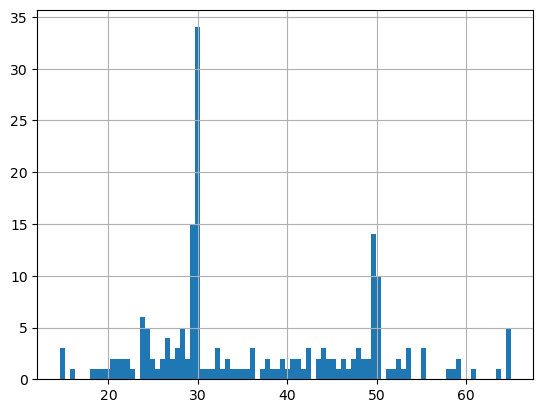

In [355]:
gf['view:incidence_angle'].hist(bins=90)

In [358]:
gf.groupby('platform').count()

geometry  id  created  updated  end_datetime  umbra:task_id  \
platform                                                                
Umbra-04        74  74       25       25            74             74   
Umbra-05        85  85       40       40            85             85   
Umbra-06        26  26       18       18            26             26   
Umbra-08         9   9        9        9             9              9   
Umbra-09         4   4        4        4             4              4   

          start_datetime  sar:product_type  sar:looks_azimuth  \
platform                                                        
Umbra-04              74                74                 74   
Umbra-05              85                85                 85   
Umbra-06              26                26                 26   
Umbra-08               9                 9                  9   
Umbra-09               4                 4                  4   

          sar:polarizations  ...  umbra:open-data-catalog  \
platform                     ...                            
Umbra-04                 74  ...                       74   
Umbra-05                 85  ...                       85   
Umbra-06                 26  ...                       26   
Umbra-08                  9  ...                        9   
Umbra-09                  4  ...                        4   

          umbra:squint_angle_degrees  umbra:grazing_angle_degrees  \
platform                                                            
Umbra-04                          74                           74   
Umbra-05                          85                           85   
Umbra-06                          26                           26   
Umbra-08                           9                            9   
Umbra-09                           4                            4   

          umbra:slant_range_kilometers  umbra:target_azimuth_angle_degrees  \
platform                                                                     
Umbra-04                            74                                  74   
Umbra-05                            85                                  85   
Umbra-06                            26                                  26   
Umbra-08                             9                                   9   
Umbra-09                             4                                   4   

          umbra:squint_angle_engineering_degrees  \
platform                                           
Umbra-04                                      74   
Umbra-05                                      85   
Umbra-06                                      26   
Umbra-08                                       9   
Umbra-09                                       4   

          umbra:squint_angle_exploitation_degrees  \
platform                                            
Umbra-04                                       74   
Umbra-05                                       85   
Umbra-06                                       26   
Umbra-08                                        9   
Umbra-09                                        4   

          umbra:squint_angle_degrees_off_broadside  datetime  timedelta  
platform                                                                 
Umbra-04                                        74         0         74  
Umbra-05                                        85         0         85  
Umbra-06                                        26         0         26  
Umbra-08                                         9         0          9  
Umbra-09                                         4         0          4  

[5 rows x 26 columns]

In [359]:
levels, categories = gpd.pd.factorize(gf['platform'])
colors = [plt.cm.tab10(i) for i in levels]
len(colors)

198

<Axes: xlabel='umbra:target_azimuth_angle_degrees', ylabel='view:incidence_angle'>

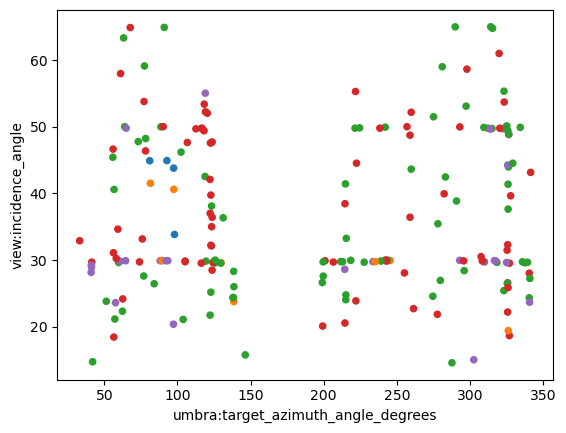

In [360]:
gf.plot.scatter(y='view:incidence_angle', x='umbra:target_azimuth_angle_degrees', color=colors)

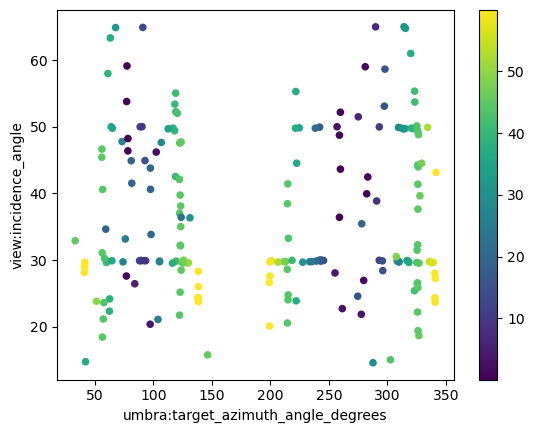

In [375]:
f, ax = plt.subplots()
m = gf.plot.scatter(ax=ax, y='view:incidence_angle', x='umbra:target_azimuth_angle_degrees', c=gf['umbra:squint_angle_degrees_off_broadside'], cmap='viridis')

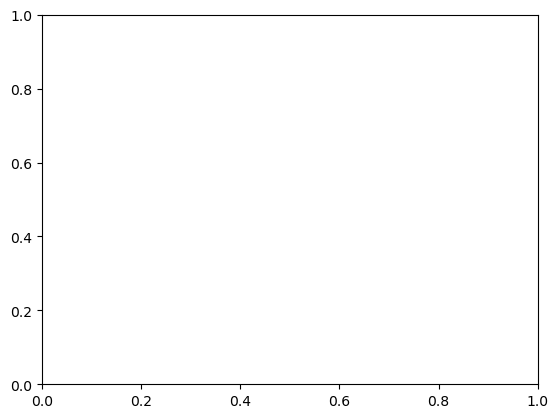

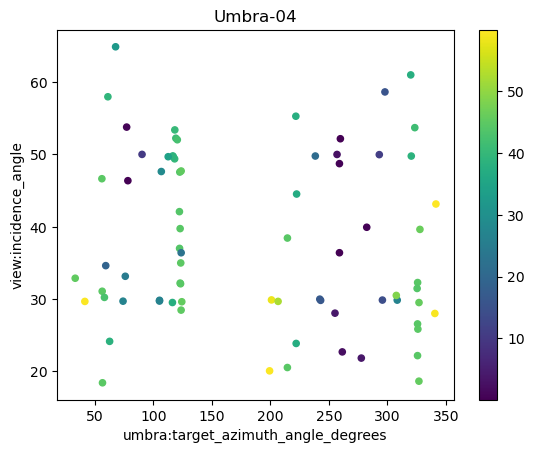

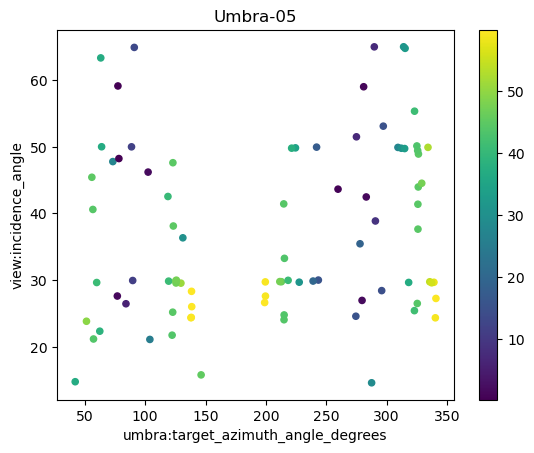

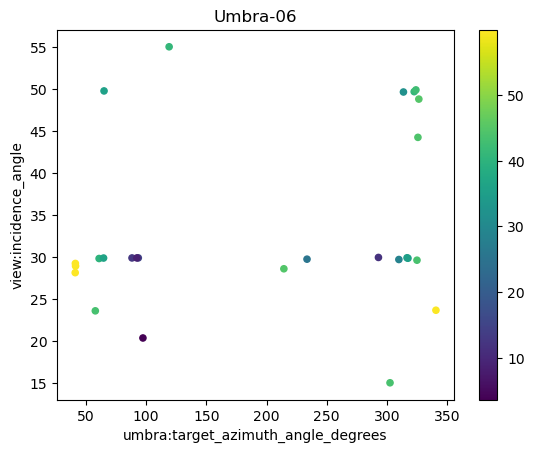

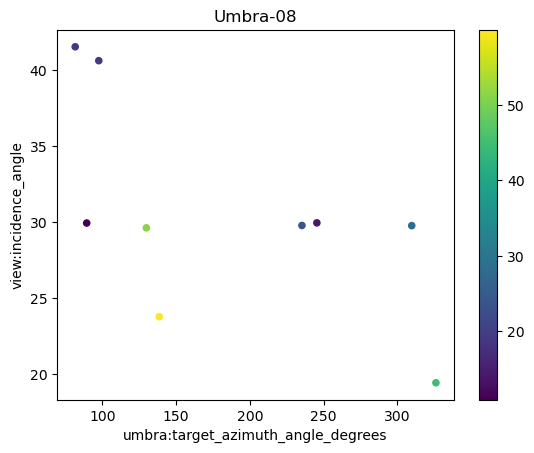

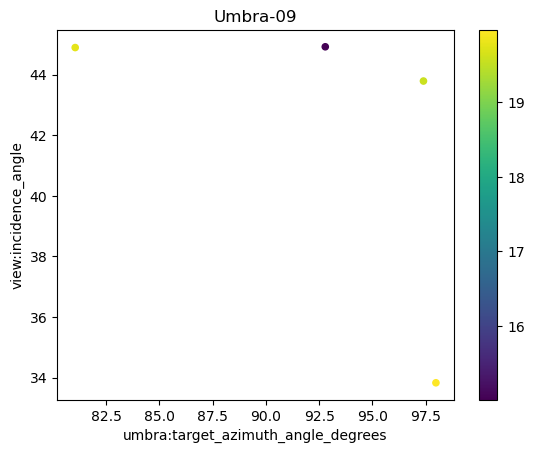

In [380]:
f, ax = plt.subplots()
for key, df in gf.groupby('platform'):
    df.plot.scatter(y='view:incidence_angle', x='umbra:target_azimuth_angle_degrees', c=df['umbra:squint_angle_degrees_off_broadside'], cmap='viridis', title=key)

## Angle definitions
https://docs.canopy.umbra.space/docs/collect-metadata

* The incidence angle is the angle between the vertical (normal) to the intercepting surface and the line of sight back to the satellite at the scene center. Measured in degrees (0-90).
* The angle between the projected vector [the collection geometry of the particular opportunity] and a reference vector [north] on the reference plane is called the azimuth. This identifies the direction from which the capture will occur. As an example, a target azimuth angle of 90 degrees means the satellite will be due looking due west at the target from a position due east of the target.

<Axes: >

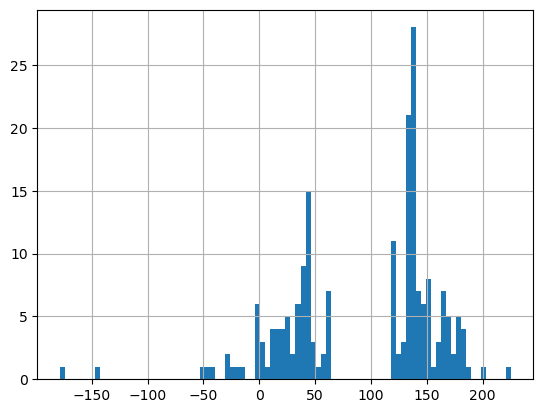

In [362]:
gf['umbra:squint_angle_degrees'].hist(bins=90)

<Axes: >

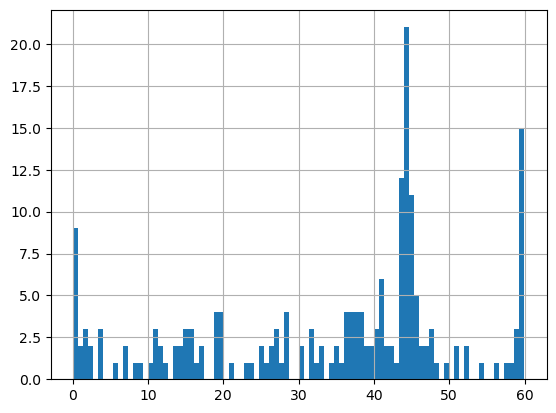

In [363]:
gf['umbra:squint_angle_degrees_off_broadside'].hist(bins=90)

In [236]:
colors=list((gf['umbra:squint_angle_degrees_off_broadside']/gf['umbra:squint_angle_degrees_off_broadside'].max()).astype(float))

## Analyze list from Nov 2024 stereo tests

In [307]:
stereo_list = [('2024-02-18-02-52-15_UMBRA-04_GEC', '2024-04-04-02-41-48_UMBRA-05_GEC'),
('2024-03-11-02-32-19_UMBRA-05_GEC', '2024-02-26-02-32-24_UMBRA-05_GEC'),
('2024-04-02-14-49-04_UMBRA-05_GEC', '2024-03-07-14-51-47_UMBRA-05_GEC'),
('2024-04-03-14-53-17_UMBRA-04_GEC', '2024-02-01-03-28-13_UMBRA-06_GEC'),
('2024-04-15-03-36-13_UMBRA-06_GEC', '2024-04-02-14-49-04_UMBRA-05_GEC'),
('2024-06-19-02-35-17_UMBRA-05_GEC', '2024-02-09-02-43-47_UMBRA-05_GEC'),
('2024-06-30-03-03-56_UMBRA-04_GEC', '2024-06-19-02-35-17_UMBRA-05_GEC'),
('2024-07-10-14-44-43_UMBRA-05_GEC', '2024-06-25-14-45-51_UMBRA-05_GEC'),
('2024-08-08-02-33-49_UMBRA-05_GEC', '2024-06-30-03-03-56_UMBRA-04_GEC')]

In [231]:
idx=gf['umbra:task_id'].isin(['525a624f-f542-4d9a-8a38-a73b57fbaf71', '371d4457-9fd4-4edf-a78b-d1c248c830cf'])

In [232]:
gf[idx]

geometry  \
60  POLYGON Z ((-79.57673 8.94204 14.31861, -79.54...   
70  POLYGON Z ((-79.57411 8.94253 14.31842, -79.55...   

                                      id                           created  \
60  ae6b41f3-ec3e-4227-94b2-6329fdb26ec2  2024-04-04T08:37:42.465466+00:00   
70  c544dcce-4250-4ae8-b4a5-dc6cb5ce79d0  2024-02-18T06:58:32.933464+00:00   

                             updated  platform  \
60  2024-04-04T08:37:42.465471+00:00  Umbra-05   
70  2024-02-18T06:58:32.933469+00:00  Umbra-04   

                       end_datetime                         umbra:task_id  \
60 2024-04-04 02:41:56.849908+00:00  371d4457-9fd4-4edf-a78b-d1c248c830cf   
70 2024-02-18 02:52:23.829711+00:00  525a624f-f542-4d9a-8a38-a73b57fbaf71   

              start_datetime sar:product_type  sar:looks_azimuth  ...  \
60 2024-04-04 02:41:49+00:00              GEC                  2  ...   
70 2024-02-18 02:52:16+00:00              GEC                  2  ...   

   umbra:open-data-catalog umbra:squint_angle_degrees  \
60                    True                  47.430294   
70                    True                  52.441326   

   umbra:grazing_angle_degrees umbra:slant_range_kilometers  \
60                   60.237606                   611.909119   
70                   60.312256                   552.000366   

    umbra:target_azimuth_angle_degrees  \
60                          211.560806   
70                          206.541855   

    umbra:squint_angle_engineering_degrees  \
60                               42.569706   
70                               37.558674   

    umbra:squint_angle_exploitation_degrees  \
60                                47.430294   
70                                52.441326   

    umbra:squint_angle_degrees_off_broadside  datetime  timedelta  
60                                 47.430294      None   7.849908  
70                                 52.441326      None   7.829711  

[2 rows x 27 columns]

In [321]:
#This is list of ids and YYYY-MM-DD-HH-MM-SS_UMBRA-0X_GEC.tif filenames from S3 sync
#ls -d */20*[0-9] > umbra_panamacanal_imglist.txt
opendata_fn_list = pd.read_csv('~/scr/umbra/umbra_panamacanal_imglist.txt', delimiter='/', dtype='str', names=['umbra:task_id','fn']).set_index('fn')

In [322]:
opendata_fn_list.index = opendata_fn_list.index+'_GEC'

In [324]:
stereo_list

[('2024-02-18-02-52-15_UMBRA-04_GEC', '2024-04-04-02-41-48_UMBRA-05_GEC'),
 ('2024-03-11-02-32-19_UMBRA-05_GEC', '2024-02-26-02-32-24_UMBRA-05_GEC'),
 ('2024-04-02-14-49-04_UMBRA-05_GEC', '2024-03-07-14-51-47_UMBRA-05_GEC'),
 ('2024-04-03-14-53-17_UMBRA-04_GEC', '2024-02-01-03-28-13_UMBRA-06_GEC'),
 ('2024-04-15-03-36-13_UMBRA-06_GEC', '2024-04-02-14-49-04_UMBRA-05_GEC'),
 ('2024-06-19-02-35-17_UMBRA-05_GEC', '2024-02-09-02-43-47_UMBRA-05_GEC'),
 ('2024-06-30-03-03-56_UMBRA-04_GEC', '2024-06-19-02-35-17_UMBRA-05_GEC'),
 ('2024-07-10-14-44-43_UMBRA-05_GEC', '2024-06-25-14-45-51_UMBRA-05_GEC'),
 ('2024-08-08-02-33-49_UMBRA-05_GEC', '2024-06-30-03-03-56_UMBRA-04_GEC')]

In [325]:
task_id_list = opendata_fn_list.loc[list(stereo_list[1])].values.astype('str').ravel().tolist()

In [326]:
task_id_list

['89f9da80-1a7d-40f8-af4b-c2aebd6054f1',
 '1fe5e71e-c4b7-4f54-95cd-ae169c801882']

In [327]:
gf[idx].columns

Index(['geometry', 'id', 'created', 'updated', 'platform', 'end_datetime',
       'umbra:task_id', 'start_datetime', 'sar:product_type',
       'sar:looks_azimuth', 'sar:polarizations', 'umbra:collect_ids',
       'sar:frequency_band', 'sar:instrument_mode', 'sar:resolution_range',
       'view:incidence_angle', 'sar:resolution_azimuth',
       'umbra:open-data-catalog', 'umbra:squint_angle_degrees',
       'umbra:grazing_angle_degrees', 'umbra:slant_range_kilometers',
       'umbra:target_azimuth_angle_degrees',
       'umbra:squint_angle_engineering_degrees',
       'umbra:squint_angle_exploitation_degrees',
       'umbra:squint_angle_degrees_off_broadside', 'datetime', 'timedelta'],
      dtype='object')

In [328]:
cols = ['platform', 'sar:resolution_range', 'sar:looks_azimuth', 'view:incidence_angle', 'umbra:squint_angle_degrees', 'umbra:target_azimuth_angle_degrees']

In [329]:
def umbra_geomplot(gf, pair=None):
    #f, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    f = plt.figure(figsize=(10, 7.5))
    G = matplotlib.gridspec.GridSpec(nrows=1, ncols=2)
    ax0 = f.add_subplot(G[0, 0:1], polar=True)
    ax1 = f.add_subplot(G[0, 1:2])

    ax0.set_theta_direction(-1)
    ax0.set_theta_zero_location("N")
    ax0.grid(True)
    
    plot_kw = {"marker": "o", "ls": "", "ms": 5}
 
    #ax0.plot(0, 0, marker="o", color="k")
    #colors=(gf['umbra:squint_angle_degrees_off_broadside']/gf['umbra:squint_angle_degrees_off_broadside'].max()).values
    colors='b'
    #gf.plot.scatter(ax=ax, x='umbra:target_azimuth_angle_degrees', y='view:incidence_angle')
    ax0.plot(np.radians(gf['umbra:target_azimuth_angle_degrees']), gf['view:incidence_angle'], \
            c=colors, **plot_kw) #label=gf['id']
    #c=gf['sar:resolution_range'].values
    ax0.set_rmin(0)
    ax0.set_rmax(70)

    gf.plot(ax=ax1, alpha=0.1, color='b', edgecolor='k', lw=0.5)
    
    if pair:
        task_id_list = opendata_fn_list.loc[list(pair)].values.astype('str').ravel().tolist()
        idx=gf['umbra:task_id'].isin(task_id_list)
        time_diff = abs(gf[idx]['start_datetime'].diff().iloc[-1])
        title=f'{pair} dt={time_diff}\n{gf[cols][idx].T}'
        f.suptitle(title)
    
        ax0.plot(np.radians(gf[idx]['umbra:target_azimuth_angle_degrees']), gf[idx]['view:incidence_angle'], color='red', **plot_kw)
    #ax.legend(loc="lower left", fontsize="small")
    
        gf[idx].plot(ax=ax1, alpha=0.5, color='r', edgecolor='k', lw=0.5)
    return f

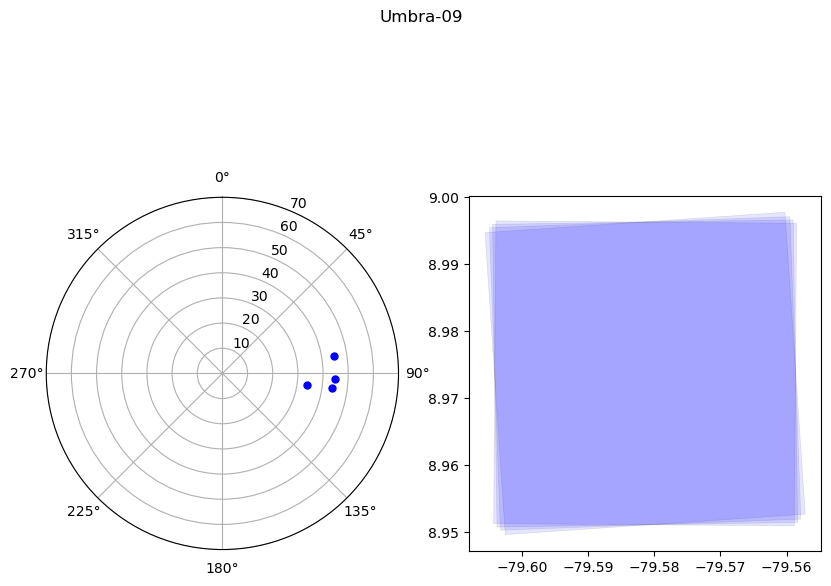

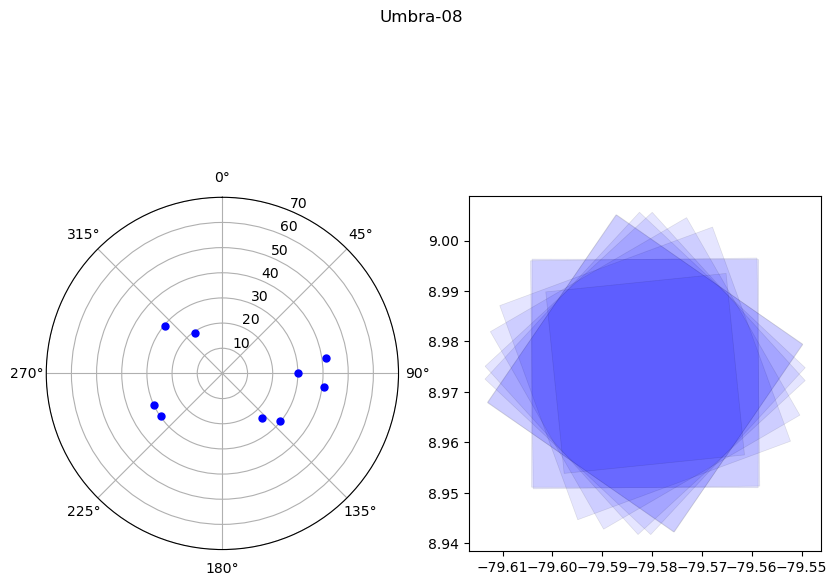

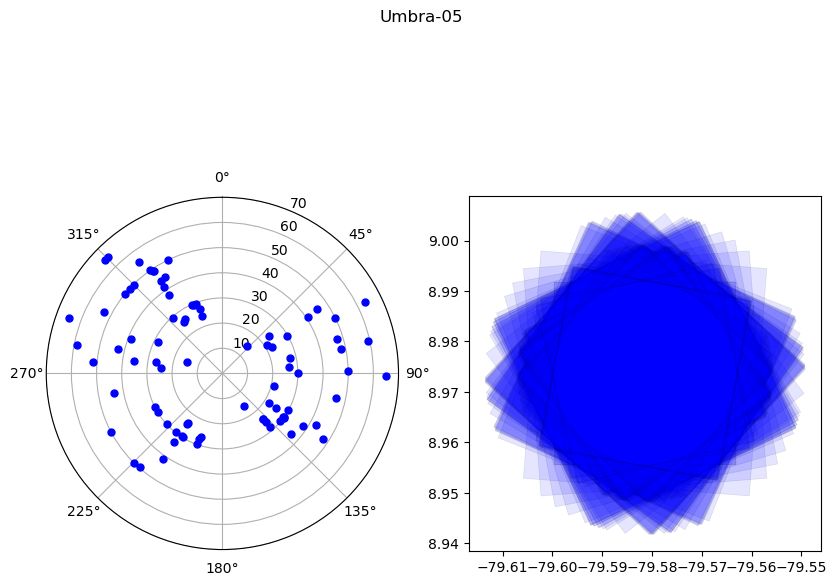

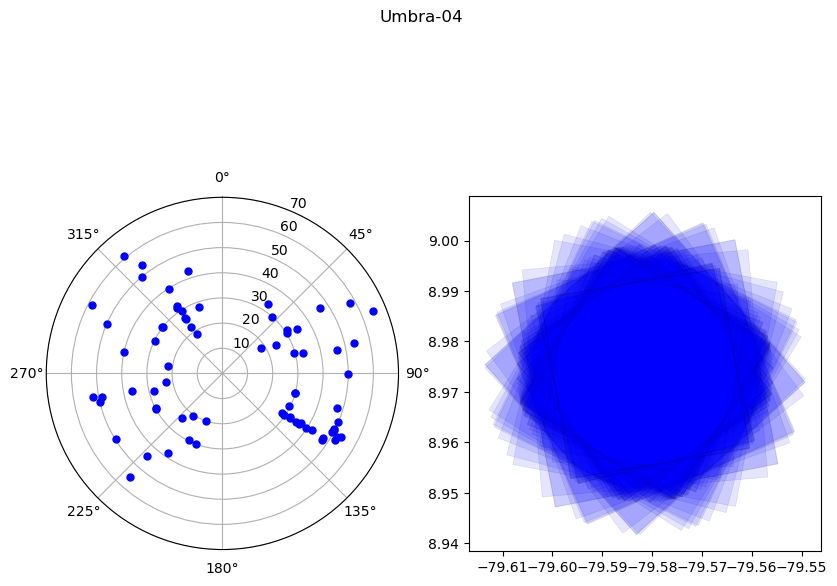

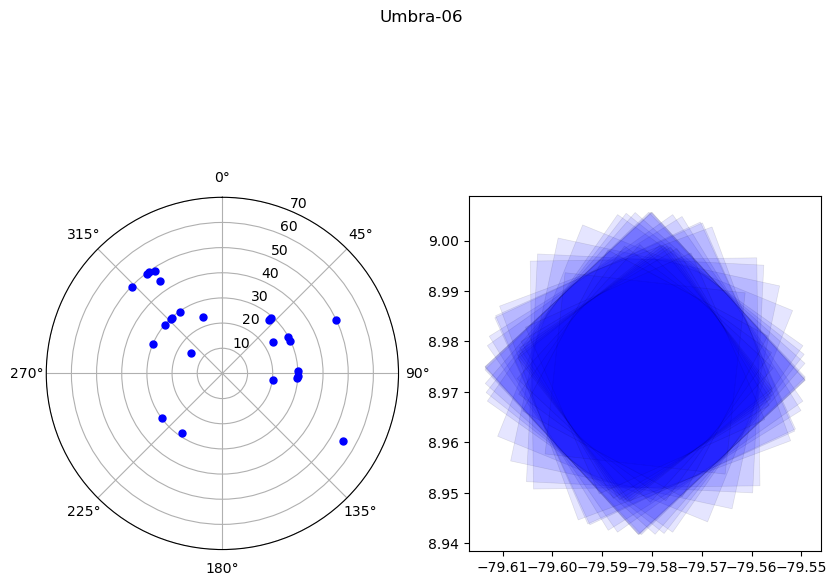

In [330]:
for platform in gf['platform'].unique():
    f = umbra_geomplot(gf[gf['platform']==platform])
    f.suptitle(platform)

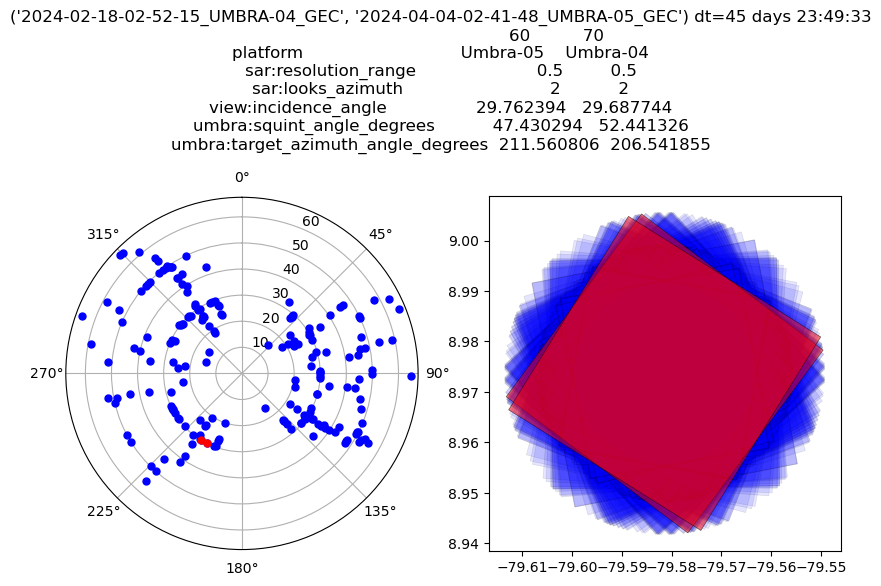

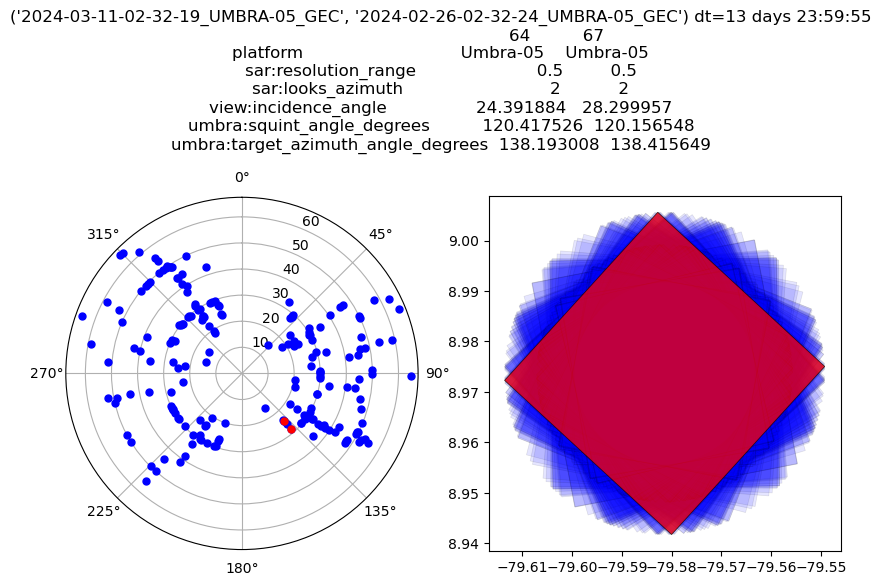

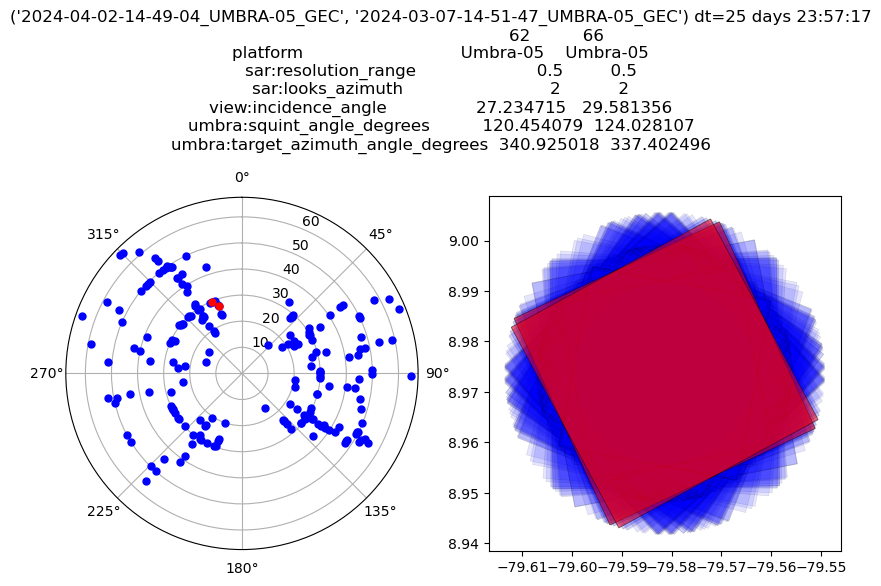

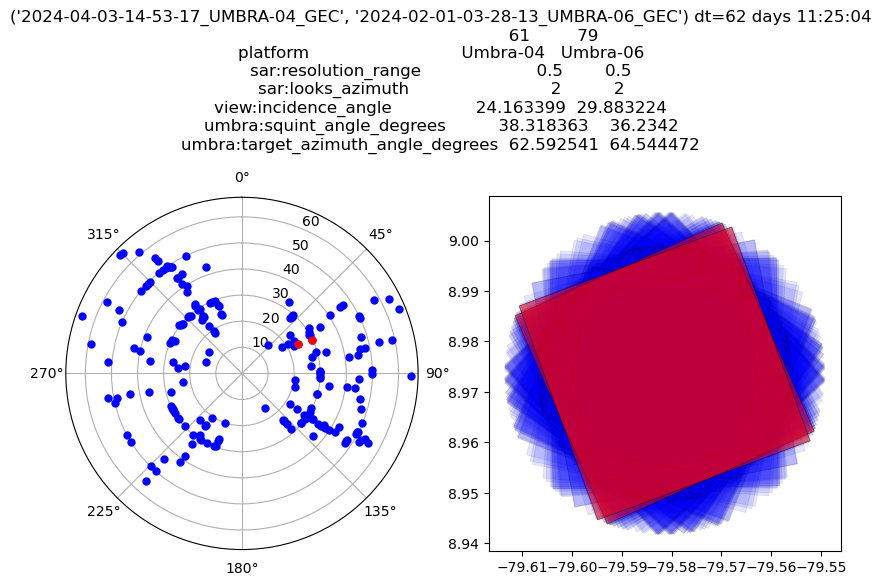

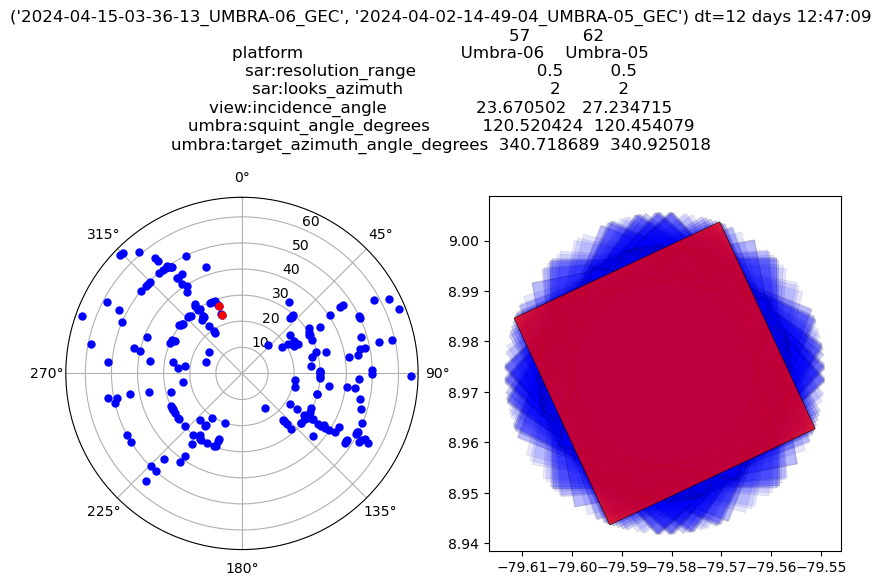

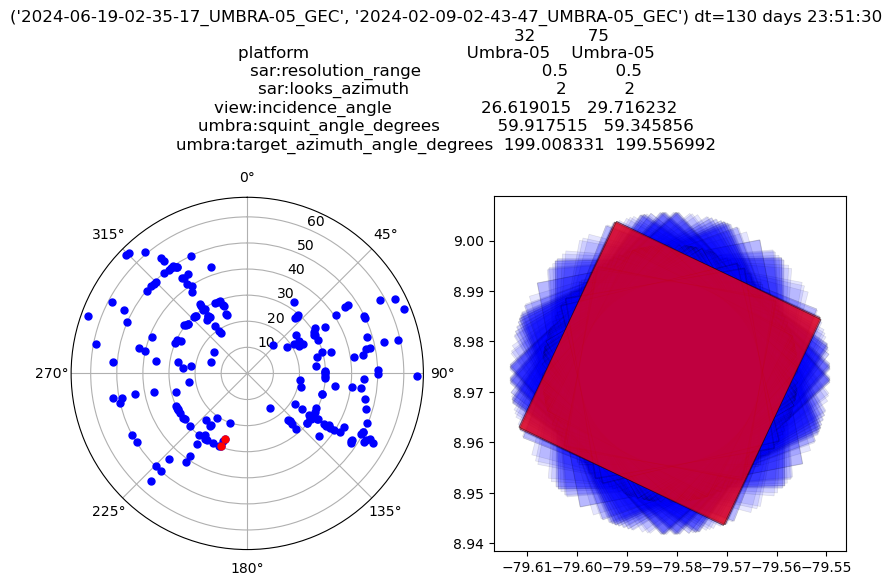

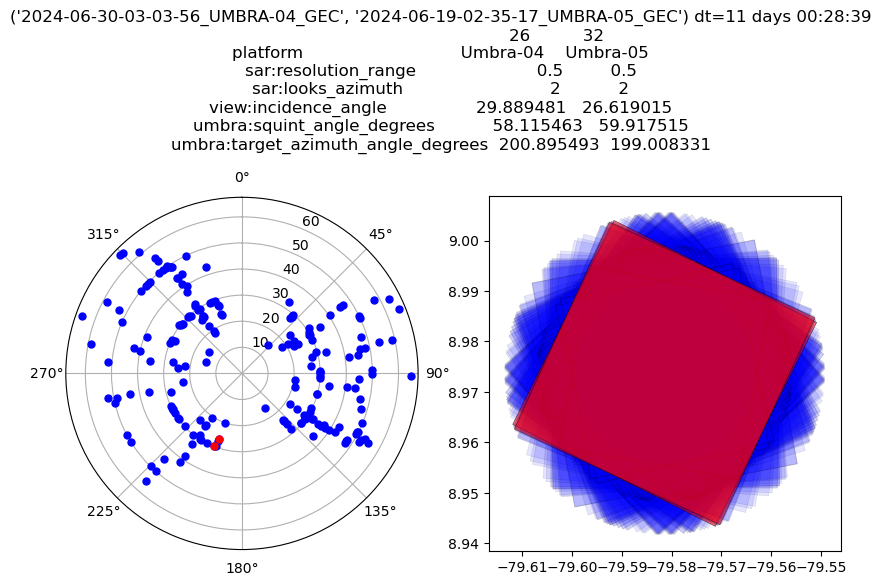

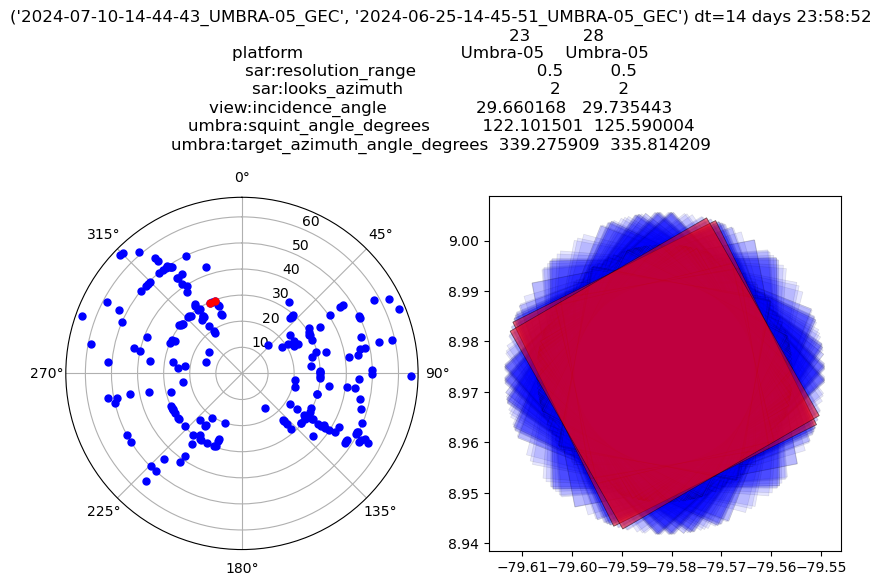

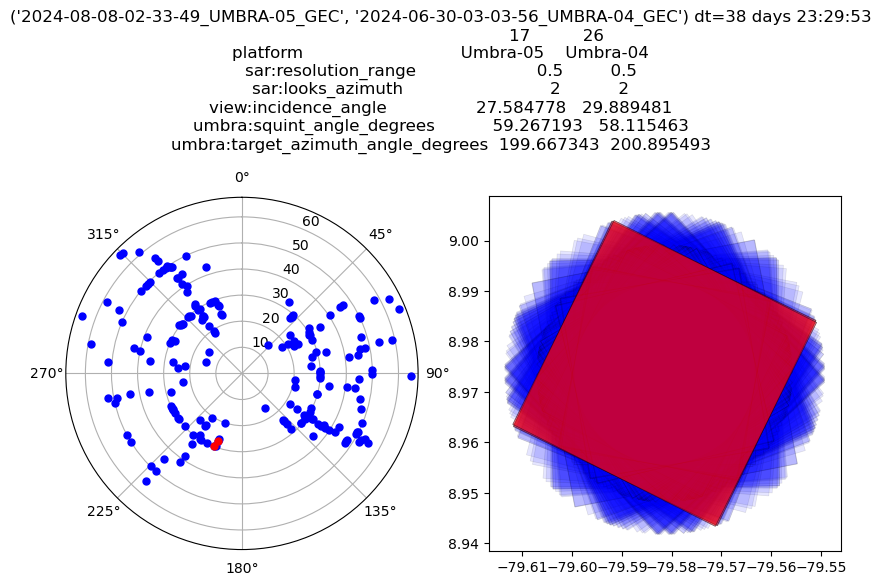

In [331]:
for pair in stereo_list:
    umbra_geomplot(gf, pair)

In [323]:
#import itertools

In [301]:
#stereo_list_flat = list(itertools.chain.from_iterable(stereo_list))

In [302]:
#gec_fn_list = pd.to_datetime(gf['start_datetime'], format='mixed').dt.strftime('%Y-%m-%d-%H-%M-%S')+'_'+gf['platform'].str.upper()+'_GEC'

In [303]:
#gec_fn_list.isin(stereo_list_flat)

In [336]:
pair=('2025-01-12-03-35-18_UMBRA-09_GEC', '2025-02-02-15-46-07_UMBRA-09_GEC')
#pair=('2025-01-12-03-35-19_UMBRA-09_GEC', '2025-02-02-15-46-08_UMBRA-09_GEC')

In [337]:
gf[gf['start_datetime'] >= '2025-01-01']

geometry  \
0  POLYGON Z ((-79.55949 8.99708 14.31576, -79.60...   
1  POLYGON Z ((-79.55892 8.99654 14.3156, -79.604...   
2  POLYGON Z ((-79.5586 8.99622 14.31551, -79.604...   
3  POLYGON Z ((-79.55898 8.9966 14.31562, -79.604...   
4  POLYGON Z ((-79.55847 8.9961 14.31548, -79.603...   
5  POLYGON Z ((-79.56023 8.99774 14.31596, -79.60...   

                                     id                           created  \
0  962f5fff-5eb2-46ac-a719-3fbbacc7972f  2025-02-03T02:28:41.838914+00:00   
1  acf5e6c0-60c8-4f9c-99ad-a8817fa3169c  2025-02-01T00:46:45.543108+00:00   
2  a39a7982-ba90-4613-b4e7-4aee479e7fa5  2025-01-25T17:45:37.779966+00:00   
3  b0f15df2-f57e-46c2-b59a-2e03181c394f  2025-01-20T18:39:07.462998+00:00   
4  015fc551-3e2f-4ba4-9069-b9b091601e05  2025-01-14T09:14:54.682994+00:00   
5  23910fdd-69f0-401d-8c84-eea9272cda2d  2025-01-13T02:46:10.317781+00:00   

                            updated  platform  \
0  2025-02-03T02:28:41.838920+00:00  Umbra-09   
1  2025-02-01T00:46:45.543114+00:00  Umbra-08   
2  2025-01-25T17:45:37.779971+00:00  Umbra-08   
3  2025-01-20T18:39:07.463002+00:00  Umbra-09   
4  2025-01-14T09:14:54.682999+00:00  Umbra-09   
5  2025-01-13T02:46:10.317786+00:00  Umbra-09   

                      end_datetime                         umbra:task_id  \
0 2025-02-02 15:46:22.510585+00:00  39d2132d-c1ff-4881-8128-3f0586b55e13   
1 2025-01-31 15:34:21.146956+00:00  84bcdbd4-bd99-4af5-8932-c59d026ef492   
2 2025-01-23 03:25:21.941110+00:00  7c81afd0-c439-474f-9df9-89573241e688   
3 2025-01-18 03:41:39.736967+00:00  234aee0f-59a6-4b57-94f2-e799357b5352   
4 2025-01-13 03:36:34.218407+00:00  bfe9e972-3bf2-4da4-b9f2-24fd8f54d157   
5 2025-01-12 03:35:33.090062+00:00  54ca569e-57d2-446a-bc0d-ba2105519fc2   

             start_datetime sar:product_type  sar:looks_azimuth  ...  \
0 2025-02-02 15:46:08+00:00              GEC                  2  ...   
1 2025-01-31 15:34:09+00:00              GEC                  2  ...   
2 2025-01-23 03:25:10+00:00              GEC                  2  ...   
3 2025-01-18 03:41:27+00:00              GEC                  2  ...   
4 2025-01-13 03:36:20+00:00              GEC                  2  ...   
5 2025-01-12 03:35:19+00:00              GEC                  2  ...   

  umbra:open-data-catalog umbra:squint_angle_degrees  \
0                    True                  19.765825   
1                    True                  19.065655   
2                    True                 160.777725   
3                    True                 160.026749   
4                    True                 160.425781   
5                    True                 164.988754   

  umbra:grazing_angle_degrees umbra:slant_range_kilometers  \
0                   45.111183                   773.942688   
1                   48.483215                   651.976562   
2                   49.397881                   640.039795   
3                   56.169724                   670.504272   
4                   46.215515                   758.888184   
5                   45.085518                   771.610046   

   umbra:target_azimuth_angle_degrees  umbra:squint_angle_engineering_degrees  \
0                           81.045967                               70.234177   
1                           81.536400                               70.934341   
2                           97.529884                              -70.777718   
3                           97.983406                              -70.026741   
4                           97.397911                              -70.425774   
5                           92.787834                              -74.988754   

   umbra:squint_angle_exploitation_degrees  \
0                                19.765823   
1                                19.065659   
2                                19.222282   
3                                19.973259   
4                                19.574226   
5                                15.011246   

   umbra:s

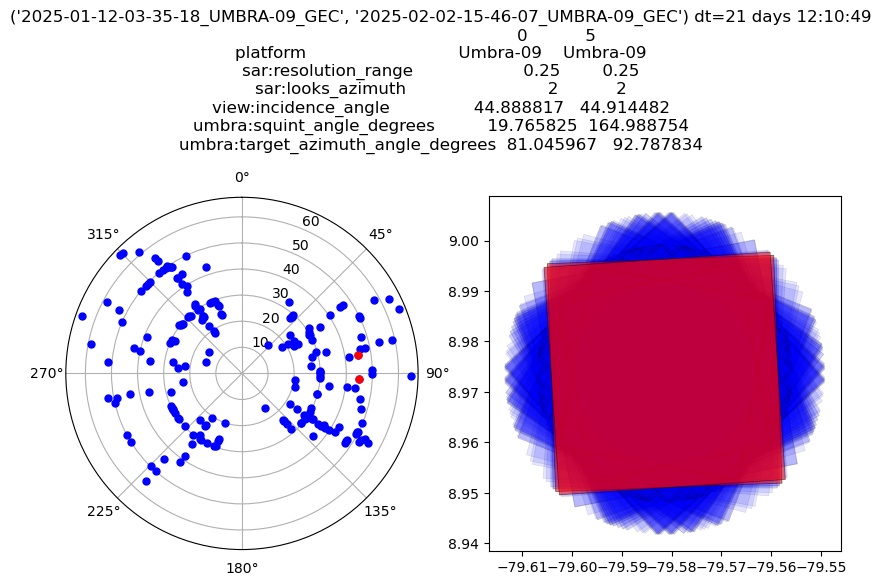

In [339]:
f = umbra_geomplot(gf, pair)